# Exploratory Data Analysis of Crime Rates in U.S. Cities and States

## Abstract

This project applies multivariate analysis, dimensionality reduction techniques (PCA and t-SNE), and clustering to gain insights from complex crime data. By leveraging these techniques, we explore high-dimensional trends and group similar data points to enhance understanding. Feature engineering further refines our analysis, ensuring focus on the most impactful variables for robust and meaningful findings.

## Introduction

Crime and safety are critical concerns for both policymakers and communities, especially in major urban centers. Analyzing crime data helps identify patterns, evaluate safety levels, and provide insights for proactive crime prevention measures. With a dataset sourced from the Kaggle, this project focuses on understanding crime trends across major U.S. cities.

The analysis examines crime rates, population statistics, and various crime categories to uncover factors that may influence safety levels in different cities. Through advanced data analysis techniques—such as multivariate analysis, dimensionality reduction, and clustering—this project aims to reveal key insights about crime patterns and potential correlations within the dataset.

## Problem Statement

This project analyzes major city crime data to uncover insights and trends, addressing challenges like data complexity and skewed distributions.

- Which cities/states have the highest and lowest crime rates?

- What are the patterns of different crime types, such as violent crimes or property crimes, across regions?

- How do population size and socioeconomic factors correlate with crime levels? etc.

By addressing these questions, this study seeks to uncover actionable insights into urban crime and potential risk factors that can help support more effective crime prevention and intervention strategies.

## Solution Approach  
Three main steps:  
1. Conducting an Exploratory Data Analysis or EDA to understand the crime data.  
2. Using machine learning techniques like clustering to identify trends and outliers.  
3. Applying feature engineering, multivariate analysis, and dimensionality reduction techniques like PCA and t-SNE to refine the insights.

### _importing libraries_ 

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### _importing dataset - data connecting_

In [2]:
df=pd.read_csv('crime_60_100.csv')

# read the dataset and stored in df to use in our project
# read_csv(' .csv')
# read_excel(' .xlsx')

In [3]:
df.head(10)

# df.head() by default gives 5 rows, same as, df.head(5)

states             cities population violent_crime murder   rape  \
0      California            Alameda     75,467         212.0    1.3  11.91   
1         Georgia             Albany     78,512       1,035.5    5.1   34.4   
2        New York             Albany     98,187         816.8    4.1   43.8   
3      California           Alhambra     84,469         176.4      -    2.4   
4           Texas              Allen     88,783          61.9      -   12.4   
5         Georgia         Alpharetta     60,031          70.0    1.7   10.0   
6      California       Apple Valley     70,823         312.0    4.2    9.9   
7       Wisconsin           Appleton     73,431         290.1      -   38.1   
8        Illinois  Arlington Heights     75,463          54.3    1.3    9.3   
9  North Carolina          Asheville     85,295         495.9    7.0   38.7   

   robbery agrv_assault prop_crime burglary  larceny vehicle_theft  
0    106.0         92.8    2,507.1    392.2  1,723.9         390.9  
1    285.3        710.7    6,369.7  1,793.4  4,291.1         285.3  
2    253.6        515.3    4,420.1    903.4  3,359.9         156.8  
3     78.1         95.9    2,271.8    384.8  1,585.2         301.9  
4     14.6         34.9    1,612.9    242.2  1,321.2          49.6  
5     30.0         28.3    2,048.9    211.6  1,792.4          45.0  
6     91.8        206.1    2,646.0    979.9  1,379.5         286.6  
7     30.0        222.0    1,895.7    345.9  1,513.0          36.8  
8     10.6         33.1    1,296.0    185.5  1,088.0          22.5  
9    165.3        284.9    5,756.5    869.9  4,492.6         393.9

#### _What is this dataset about?_



1. states - states where the crime has happened - string
2. cities - cities where said crime has happened - string
3. population - population residing in each city - int
4. violent_crime - Number of violent crimes - float
5. murder - Number of murder cases - float
6. rape - Number of rape cases - float
7. robbery - Number of robbery cases - float
8. agrv_assault - Number of aggravated assualt cases - float
9. prop_crime - Number of property crime cases - float
10. burglary - Number of burglary cases - float
11. larceny - Number of larceny cases - float
12. vehicle_theft - Number of vehicle thefts - float




### _data description_

In [4]:
df.shape

(305, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   states         305 non-null    object 
 1   cities         305 non-null    object 
 2   population     305 non-null    object 
 3   violent_crime  295 non-null    object 
 4   murder         305 non-null    object 
 5   rape           295 non-null    object 
 6   robbery        305 non-null    float64
 7   agrv_assault   305 non-null    object 
 8   prop_crime     304 non-null    object 
 9   burglary       304 non-null    object 
 10  larceny        305 non-null    object 
 11  vehicle_theft  305 non-null    object 
dtypes: float64(1), object(11)
memory usage: 28.7+ KB


In [6]:
df.describe()

robbery
count  305.000000
mean   116.519344
std    116.787983
min      4.800000
25%     38.900000
50%     81.600000
75%    152.300000
max    972.100000

In [7]:
df.dtypes

states            object
cities            object
population        object
violent_crime     object
murder            object
rape              object
robbery          float64
agrv_assault      object
prop_crime        object
burglary          object
larceny           object
vehicle_theft     object
dtype: object

#### _Questions to ask yourself_

- which state has the highest crime rate?
- which city has the highest crime rate?
- which state has the lowest crime rate?
- which city has the lowest crime rate?
- which city is the least safe?
- which city is the most safe?
- which state has highest population and what is its degree of safety w.r.t. the crime rate?
- city/state with highest murder(and other crimes listed in dataset) cases?

### _Null values_

In [8]:
df.isnull().sum()

states            0
cities            0
population        0
violent_crime    10
murder            0
rape             10
robbery           0
agrv_assault      0
prop_crime        1
burglary          1
larceny           0
vehicle_theft     0
dtype: int64

### _Percentage of null values_

In [9]:
df.isnull().sum() * 100/len(df)

states           0.000000
cities           0.000000
population       0.000000
violent_crime    3.278689
murder           0.000000
rape             3.278689
robbery          0.000000
agrv_assault     0.000000
prop_crime       0.327869
burglary         0.327869
larceny          0.000000
vehicle_theft    0.000000
dtype: float64

- violent_crime: 3.278689
- rape: 3.278689
- prop_crime: 0.327869
- burglary: 0.327869

## DATA CLEANING

In [10]:
# df.dropna()
# x = 0, working with rows

# df.dropna(axis=1)
# x = 1, working with columns

### _Convert Numeric Columns to Appropriate Types_

In [11]:
# We will convert columns that should be numeric but are currently strings.

# Convert object columns to numeric, ignoring errors for now
cols_to_convert = ['violent_crime', 'murder', 'rape', 'robbery', 'agrv_assault', 
                   'prop_crime', 'burglary', 'larceny', 'vehicle_theft']

# Convert columns to numeric types (they might be strings due to bad data)
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')


### _Handle Missing Values_

In [12]:
# We can either drop rows with missing values or fill them in. 

# Option A: Fill missing values with mean (or median)
# Option B: Drop rows with missing values (if you don't want to impute)

# Chosen to fill missing values with the mean of each column
df[cols_to_convert] = df[cols_to_convert].fillna(df[cols_to_convert].mean())


In [13]:
# Verify Data Types and Missing Values
# Check if the columns have been successfully converted and cleaned.

# Verify data types and check for any remaining missing values
print(df.info())  # Check data types
print(df.isnull().sum())  # Check for any remaining missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   states         305 non-null    object 
 1   cities         305 non-null    object 
 2   population     305 non-null    object 
 3   violent_crime  305 non-null    float64
 4   murder         305 non-null    float64
 5   rape           305 non-null    float64
 6   robbery        305 non-null    float64
 7   agrv_assault   305 non-null    float64
 8   prop_crime     305 non-null    float64
 9   burglary       305 non-null    float64
 10  larceny        305 non-null    float64
 11  vehicle_theft  305 non-null    float64
dtypes: float64(9), object(3)
memory usage: 28.7+ KB
None
states           0
cities           0
population       0
violent_crime    0
murder           0
rape             0
robbery          0
agrv_assault     0
prop_crime       0
burglary         0
larceny          0
vehicle_thef

In [14]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_crime_data.csv', index=False)


In [15]:
df.head(5)

states    cities population  violent_crime    murder   rape  robbery  \
0  California   Alameda     75,467     212.000000  1.300000  11.91    106.0   
1     Georgia    Albany     78,512     342.005755  5.100000  34.40    285.3   
2    New York    Albany     98,187     816.800000  4.100000  43.80    253.6   
3  California  Alhambra     84,469     176.400000  5.499541   2.40     78.1   
4       Texas     Allen     88,783      61.900000  5.499541  12.40     14.6   

   agrv_assault  prop_crime    burglary     larceny  vehicle_theft  
0          92.8  777.328571  392.200000  798.058621          390.9  
1         710.7  777.328571  521.504878  798.058621          285.3  
2         515.3  777.328571  903.400000  798.058621          156.8  
3          95.9  777.328571  384.800000  798.058621          301.9  
4          34.9  777.328571  242.200000  798.058621           49.6

In [16]:
# Remove commas (if any) and convert population to numeric
df['population'] = pd.to_numeric(df['population'].str.replace(',', ''), errors='coerce')


In [17]:
df.head(5)

states    cities  population  violent_crime    murder   rape  robbery  \
0  California   Alameda       75467     212.000000  1.300000  11.91    106.0   
1     Georgia    Albany       78512     342.005755  5.100000  34.40    285.3   
2    New York    Albany       98187     816.800000  4.100000  43.80    253.6   
3  California  Alhambra       84469     176.400000  5.499541   2.40     78.1   
4       Texas     Allen       88783      61.900000  5.499541  12.40     14.6   

   agrv_assault  prop_crime    burglary     larceny  vehicle_theft  
0          92.8  777.328571  392.200000  798.058621          390.9  
1         710.7  777.328571  521.504878  798.058621          285.3  
2         515.3  777.328571  903.400000  798.058621          156.8  
3          95.9  777.328571  384.800000  798.058621          301.9  
4          34.9  777.328571  242.200000  798.058621           49.6

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   states         305 non-null    object 
 1   cities         305 non-null    object 
 2   population     305 non-null    int64  
 3   violent_crime  305 non-null    float64
 4   murder         305 non-null    float64
 5   rape           305 non-null    float64
 6   robbery        305 non-null    float64
 7   agrv_assault   305 non-null    float64
 8   prop_crime     305 non-null    float64
 9   burglary       305 non-null    float64
 10  larceny        305 non-null    float64
 11  vehicle_theft  305 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 28.7+ KB


### _Check for duplicates_

In [19]:
# Check for duplicates
print(df.duplicated().sum())


0


No duplicates were found

### _Check for outliers_

In [20]:
# Checking for outliers
import numpy as np

from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))
print(np.where(z_scores > 3))  # Find rows where Z-score > 3


(array([ 30,  36,  36,  36,  36,  37,  37,  38,  58,  58,  63,  81,  84,
        86,  86,  92,  92, 100, 100, 103, 111, 117, 117, 121, 138, 138,
       154, 168, 172, 200, 200, 216, 218, 230, 248, 267, 267, 283, 287,
       295, 297, 297, 297, 302], dtype=int64), array([5, 2, 3, 4, 9, 1, 4, 6, 3, 5, 5, 9, 8, 2, 5, 2, 9, 6, 8, 3, 4, 6,
       8, 3, 8, 9, 8, 8, 8, 6, 8, 8, 3, 9, 9, 2, 4, 8, 3, 6, 2, 4, 5, 2],
      dtype=int64))


- The first array contains the row indices where outliers are found.
- The second array shows the column indices where these outliers occur.

### _Display the rows with outliers_

In [21]:
# Display the rows with outliers
outlier_rows = [30, 36, 37, 38, 58, 63, 81, 84, 86, 92, 100, 103, 111, 117, 121, 138, 154, 168, 172, 200, 216, 218, 230, 248, 267, 283, 287, 295, 297, 302]
print(df.iloc[outlier_rows])


            states          cities  population  violent_crime     murder  \
30   Massachusetts        Brockton       95156     342.005755   6.300000   
36      New Jersey          Camden       77665     342.005755  86.300000   
37            Ohio          Canton       72914     999.800000  13.700000   
38         Indiana          Carmel       81819      13.400000   5.499541   
58            Iowa  Council Bluffs       62708     342.005755   1.600000   
63         Florida   Daytona Beach       61861     342.005755   6.500000   
81      Washington     Federal Way       91978     321.800000   3.300000   
84           Texas    Flower Mound       68023      30.900000   5.499541   
86         Florida      Fort Myers       64379     342.005755  37.300000   
92         Indiana            Gary       80472     904.700000  46.000000   
100    Connecticut       Greenwich       61948      37.100000   5.499541   
103           Ohio        Hamilton       62791     592.400000   4.800000   
111        F

##### I am keeping the above outliers since they represent valid cases (e.g., higher crime rates in some cities are realistic and may be crucial for my analysis).

# FEATURE SCALING & ENGINEERING

### _Min-Max Scaling_

In [22]:
# Feature Scaling (Min-Max Scaling)
# We'll apply Min-Max scaling to normalize the data.

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale (excluding categorical variables)
columns_to_scale = ['population', 'violent_crime', 'murder', 'rape', 'robbery', 'agrv_assault',
                    'prop_crime', 'burglary', 'larceny', 'vehicle_theft']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply scaling on the selected columns
scaled_data = scaler.fit_transform(df[columns_to_scale])

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Add scaled data back to the original DataFrame (optional)
df[columns_to_scale] = df_scaled

print(df.head())  # To check the result of scaling


       states    cities  population  violent_crime    murder      rape  \
0  California   Alameda    0.386267       0.201338  0.003517  0.068635   
1     Georgia    Albany    0.462464       0.333136  0.048066  0.211429   
2    New York    Albany    0.954807       0.814477  0.036342  0.271111   
3  California  Alhambra    0.611531       0.165247  0.052750  0.008254   
4       Texas     Allen    0.719484       0.049169  0.052750  0.071746   

    robbery  agrv_assault  prop_crime  burglary   larceny  vehicle_theft  
0  0.104621      0.092909    0.511797  0.361888  0.618626       0.401277  
1  0.289982      0.737226    0.511797  0.497798  0.618626       0.290782  
2  0.257211      0.533472    0.511797  0.899201  0.618626       0.156325  
3  0.075778      0.096142    0.511797  0.354110  0.618626       0.308151  
4  0.010131      0.032534    0.511797  0.204225  0.618626       0.044156  


The Min-Max scaling has normalized your numeric features to a range of 0 to 1. The total_crime column is still in its original form since it wasn’t part of the scaled columns, but everything else is now on a comparable scale.

### _Correlation matrix_

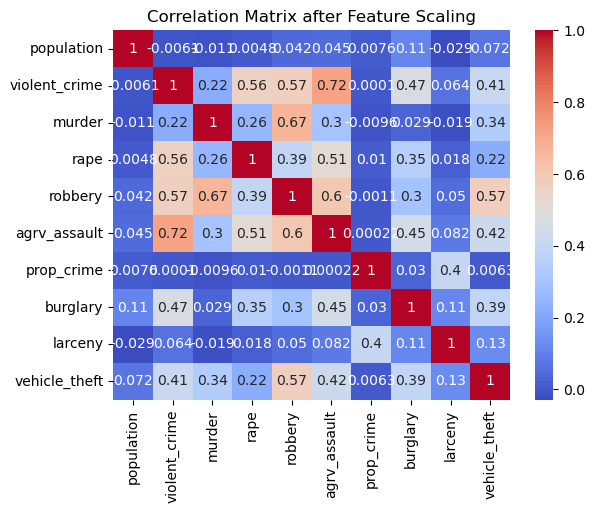

In [24]:
# Correlation matrix
correlation_matrix = df_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix after Feature Scaling')
plt.show()


In [25]:
#  Feature Engineering
# Now, let's create some new features that could provide more insights into the dataset.

# Crime Rate Per Capita: Crime per 100,000 population.
# Property to Violent Crime Ratio: Ratio of property crimes to violent crimes.

### _Creating new features_

In [26]:
# Feature Engineering: Crime rate per capita (per 100,000 population)
df['violent_crime_per_capita'] = (df['violent_crime'] / df['population']) * 100000
df['property_crime_per_capita'] = (df['prop_crime'] / df['population']) * 100000

# Feature Engineering: Property to Violent Crime Ratio
df['property_to_violent_ratio'] = df['prop_crime'] / df['violent_crime']

print(df[['violent_crime_per_capita', 'property_crime_per_capita', 'property_to_violent_ratio']].head())


   violent_crime_per_capita  property_crime_per_capita  \
0              52124.106821              132498.239653   
1              72035.048101              110667.324673   
2              85302.771004               53602.128821   
3              27021.913275               83691.088767   
4               6833.887588               71133.932501   

   property_to_violent_ratio  
0                   2.541976  
1                   1.536298  
2                   0.628375  
3                   3.097156  
4                  10.409000  


In [27]:
# Visualizing After Scaling
# Now that we've scaled the data and added new features, you can create visualizations to see the effects.

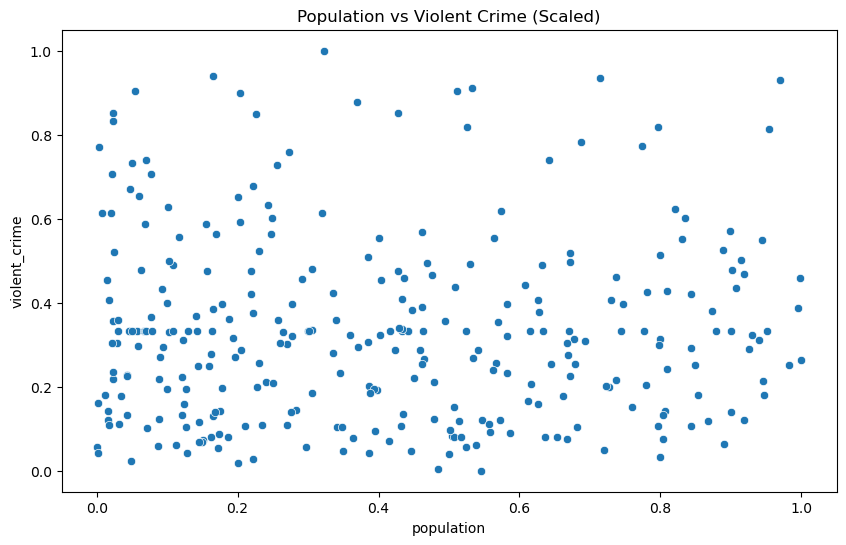

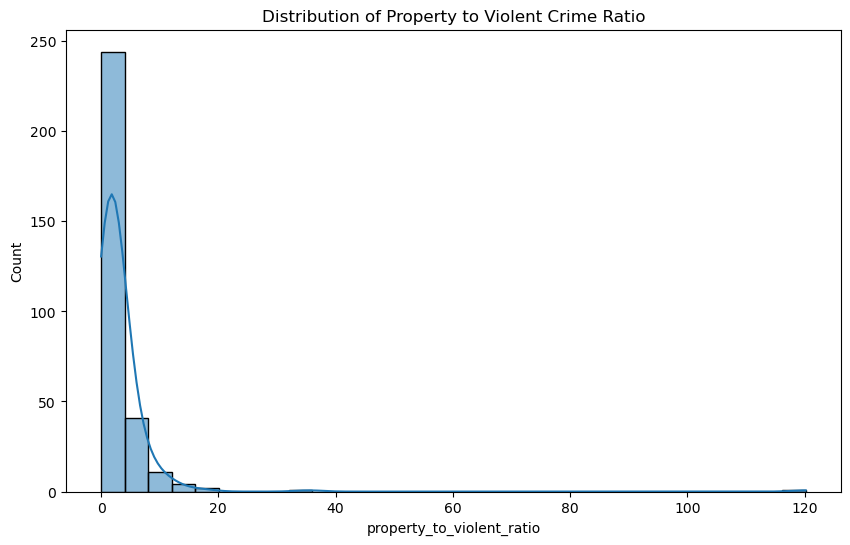

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of scaled population vs violent crime
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='violent_crime', data=df)
plt.title('Population vs Violent Crime (Scaled)')
plt.show()

# Visualizing the new feature: Property to Violent Crime Ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['property_to_violent_ratio'], bins=30, kde=True)
plt.title('Distribution of Property to Violent Crime Ratio')
plt.show()


# DATA VISUALIZATION

### _Histogram_

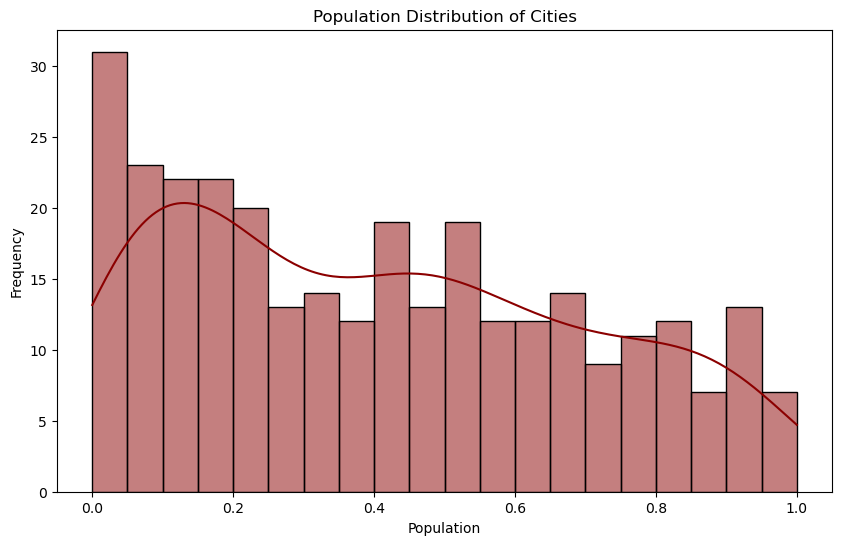

In [29]:
# Visualize Population Distribution
# A histogram is a good way to see the spread of population across the cities.

# Plot population distribution
plt.figure(figsize=(10,6))
sns.histplot(df['population'], bins=20, kde=True, color='darkred')
plt.title('Population Distribution of Cities')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

### From this plot, you'll be able to determine if the population is skewed (i.e., do a few cities have much larger populations than others)
not normally distributed.

### _Correlation Heatmap_

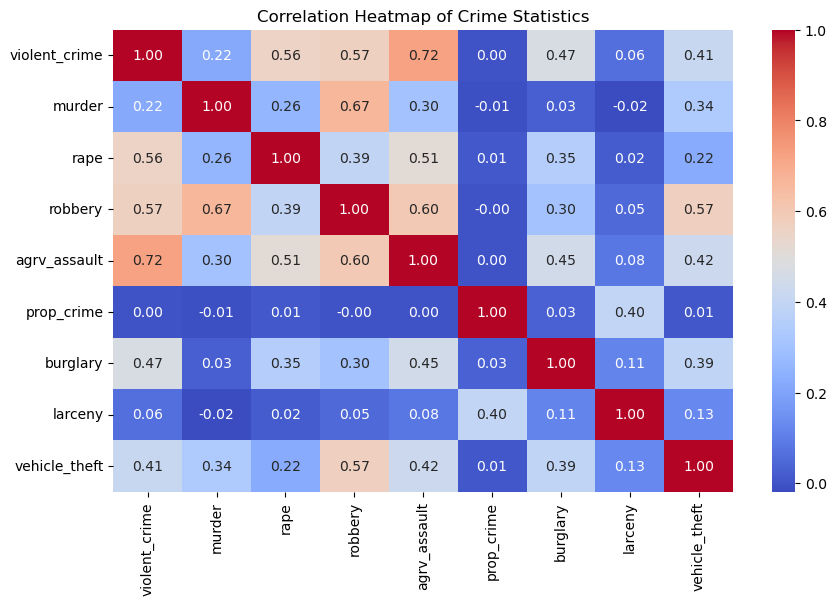

In [30]:
# Correlation Heatmap
# To understand relationships between the different types of crimes, a correlation heatmap is very helpful.

# Calculate the correlation matrix
corr_matrix = df[['violent_crime', 'murder', 'rape', 'robbery', 
                    'agrv_assault', 'prop_crime', 'burglary', 
                    'larceny', 'vehicle_theft']].corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Crime Statistics')
plt.show()


<!-- Strong positive correlations suggest that as one type of crime increases, others may also increase. For instance, violent crime might be highly correlated with aggravated assault or robbery. -->

### Strong positive correlations suggest that as one type of crime increases, others may also increase. For instance, violent crime might be highly correlated with aggravated assault or robbery.

### _Bar Plot_

C:\Users\CHELSA\AppData\Local\Temp\ipykernel_33116\3490546686.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cities', y='violent_crime', data=top_cities, palette='Reds')


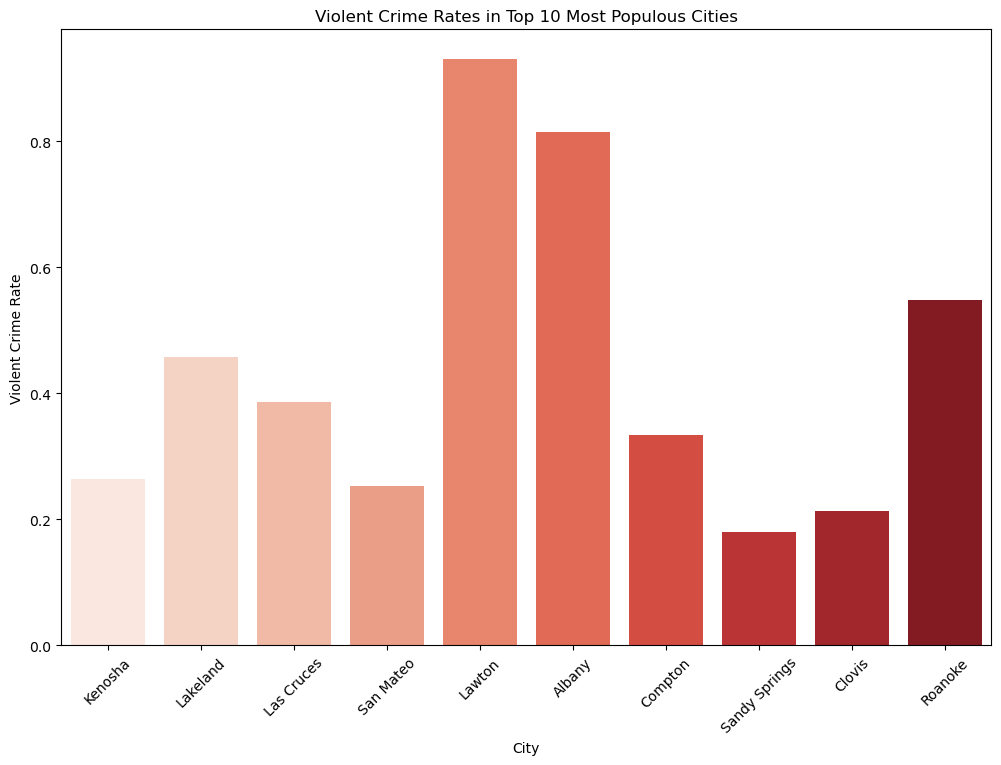

In [31]:
# Bar Plot of Top Cities by Population vs. Crime Rates
# You can now visualize the crime rates of the top cities by population.

# Sort the data by population and take the top 10 cities
top_cities = df.sort_values(by='population', ascending=False).head(10)

# Plotting crime rates for the top cities
plt.figure(figsize=(12,8))
sns.barplot(x='cities', y='violent_crime', data=top_cities, palette='Reds')
plt.title('Violent Crime Rates in Top 10 Most Populous Cities')
plt.xlabel('City')
plt.ylabel('Violent Crime Rate')
plt.xticks(rotation=45)
plt.show()


### This plot shows how violent crime rates vary across the most populated cities. You can quickly identify which cities have the highest or lowest violent crime rates relative to their population size.

### _Barplot_

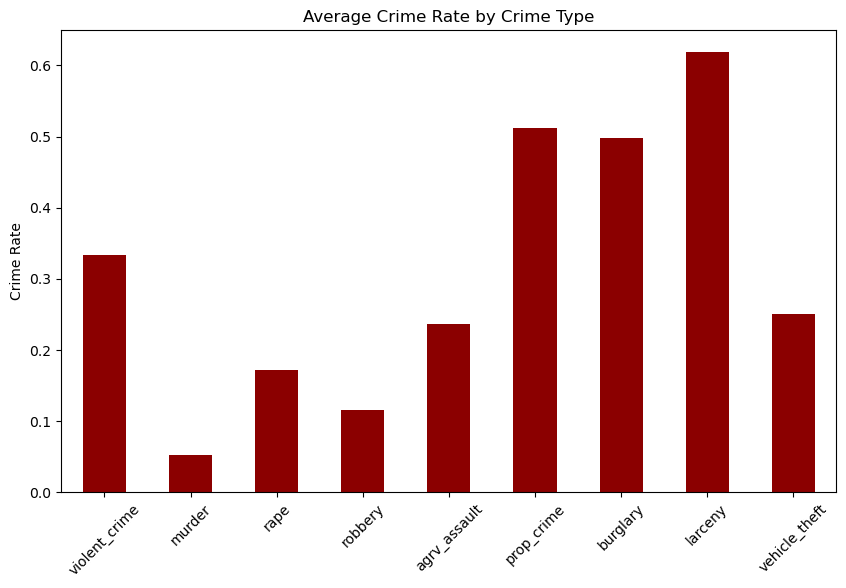

In [32]:
# Crime Type Distribution
# Visualize how each type of crime contributes to the overall crime count.

# Calculate the mean crime statistics for all types of crimes
crime_types = df[['violent_crime', 'murder', 'rape', 'robbery', 
                    'agrv_assault', 'prop_crime', 'burglary', 
                    'larceny', 'vehicle_theft']].mean()

# Plot the crime distribution
plt.figure(figsize=(10,6))
crime_types.plot(kind='bar', color='darkred')
plt.title('Average Crime Rate by Crime Type')
plt.ylabel('Crime Rate')
plt.xticks(rotation=45)
plt.show()


### You can see which type of crime occurs most frequently. For example, property crimes like larceny might occur far more often than violent crimes like murder.

### _Scatter Plot_

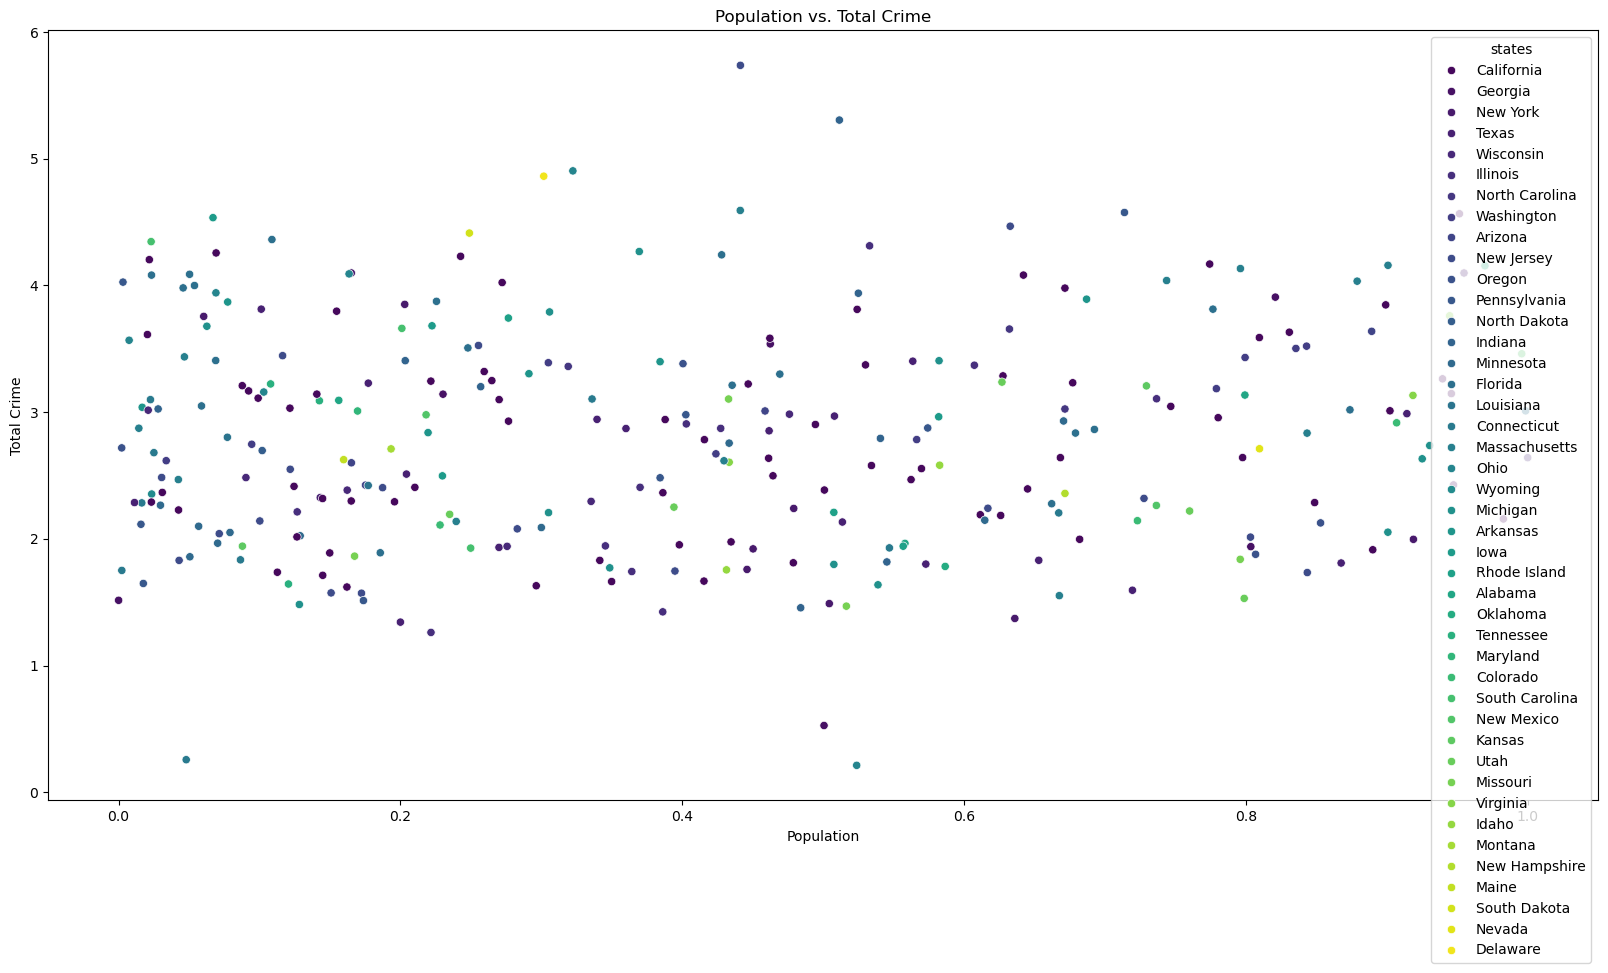

In [33]:
# Scatter Plot of Population vs. Total Crime
# A scatter plot to check if there's a relationship between city population and total crime rate.

# Calculate total crime by summing all types of crimes
df['total_crime'] = df[['violent_crime', 'murder', 'rape', 'robbery', 
                            'agrv_assault', 'prop_crime', 'burglary', 
                            'larceny', 'vehicle_theft']].sum(axis=1)

# Plot population vs total crime
plt.figure(figsize=(20,10))
sns.scatterplot(x='population', y='total_crime', data=df, hue='states', palette='viridis')
plt.title('Population vs. Total Crime')
plt.xlabel('Population')
plt.ylabel('Total Crime')
plt.show()


### _Pie Chart_

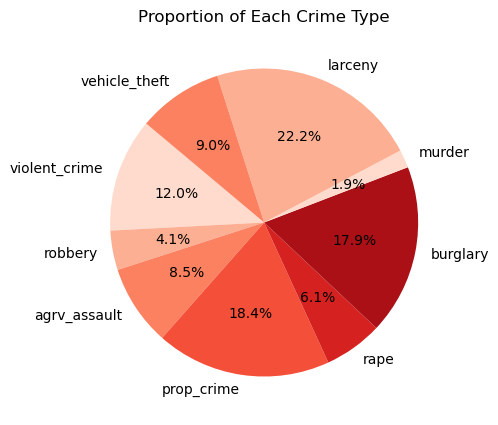

In [34]:
# Pie Chart for Crime Type Proportions
# To visualize the average proportions of different types of crimes across all cities:

# Calculate the mean values for each crime type
crime_means = df[['violent_crime', 'robbery', 
                    'agrv_assault', 'prop_crime','rape', 'burglary', 'murder',
                    'larceny', 'vehicle_theft']].mean()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(crime_means, labels=crime_means.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Reds"))
plt.title('Proportion of Each Crime Type')
plt.show()

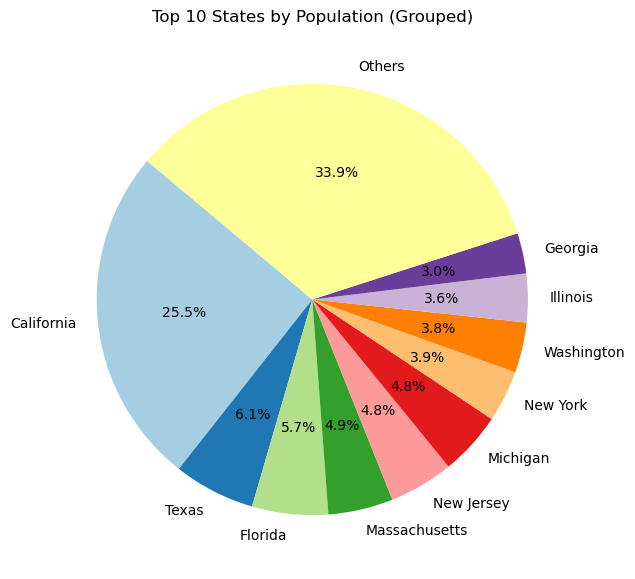

In [35]:
# Pie Chart for Top 10 States by Population

# Sort the data by population and take the top 10 states
top_n_states = 10
population_by_state = df.groupby('states')['population'].sum()
top_states = population_by_state.nlargest(top_n_states)

# Create a new category "Others" for the rest of the states
others = population_by_state[~population_by_state.index.isin(top_states.index)].sum()

# Append "Others" to the top states
top_states['Others'] = others

# Plot the pie chart
plt.figure(figsize=(7,7))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired", len(top_states)))
plt.title(f'Top {top_n_states} States by Population (Grouped)')
plt.show()


### _Horizontal Barcharts_

C:\Users\CHELSA\AppData\Local\Temp\ipykernel_33116\3392794029.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=violent_crime_by_state, y=violent_crime_by_state.index, palette='Reds')


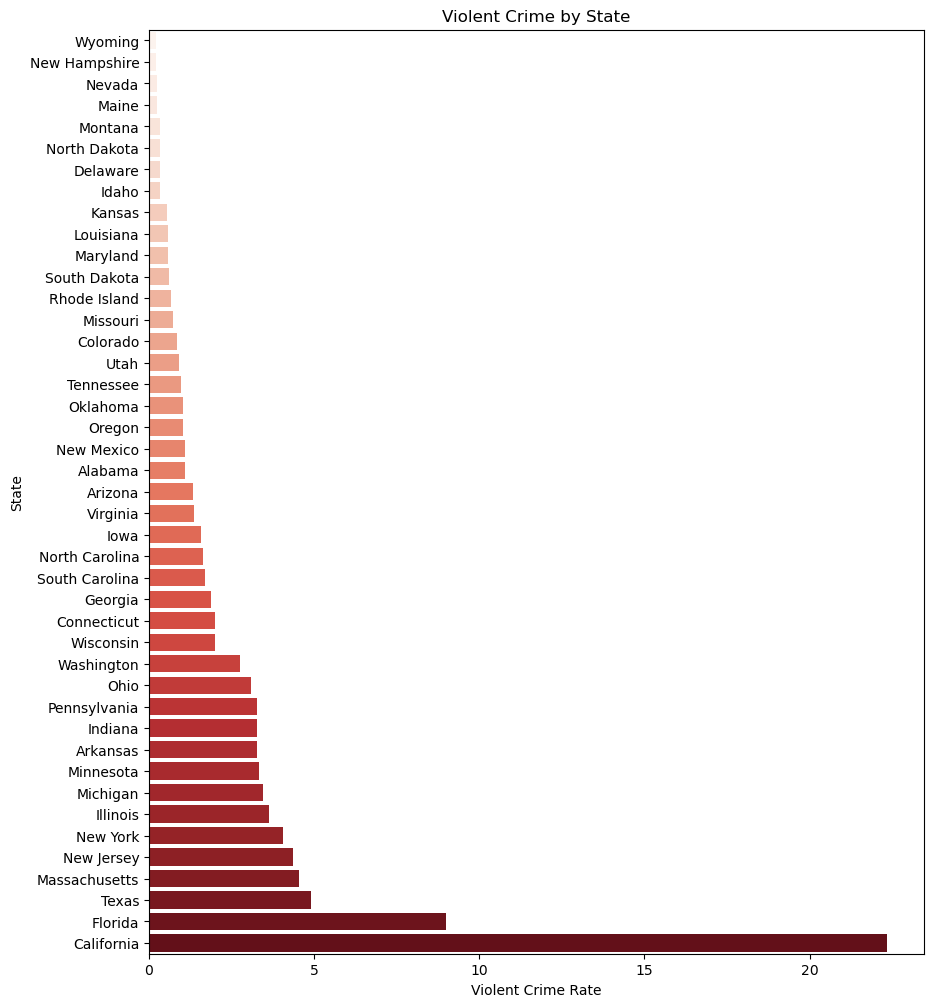

In [36]:
# Horizontal Bar Chart for Violent Crime by State

# Group by states and sum violent crimes
violent_crime_by_state = df.groupby('states')['violent_crime'].sum().sort_values(ascending=True)

# Plot the bar chart
plt.figure(figsize=(10,12))
sns.barplot(x=violent_crime_by_state, y=violent_crime_by_state.index, palette='Reds')
plt.title('Violent Crime by State')
plt.xlabel('Violent Crime Rate')
plt.ylabel('State')
plt.show()


### _Pairplot_

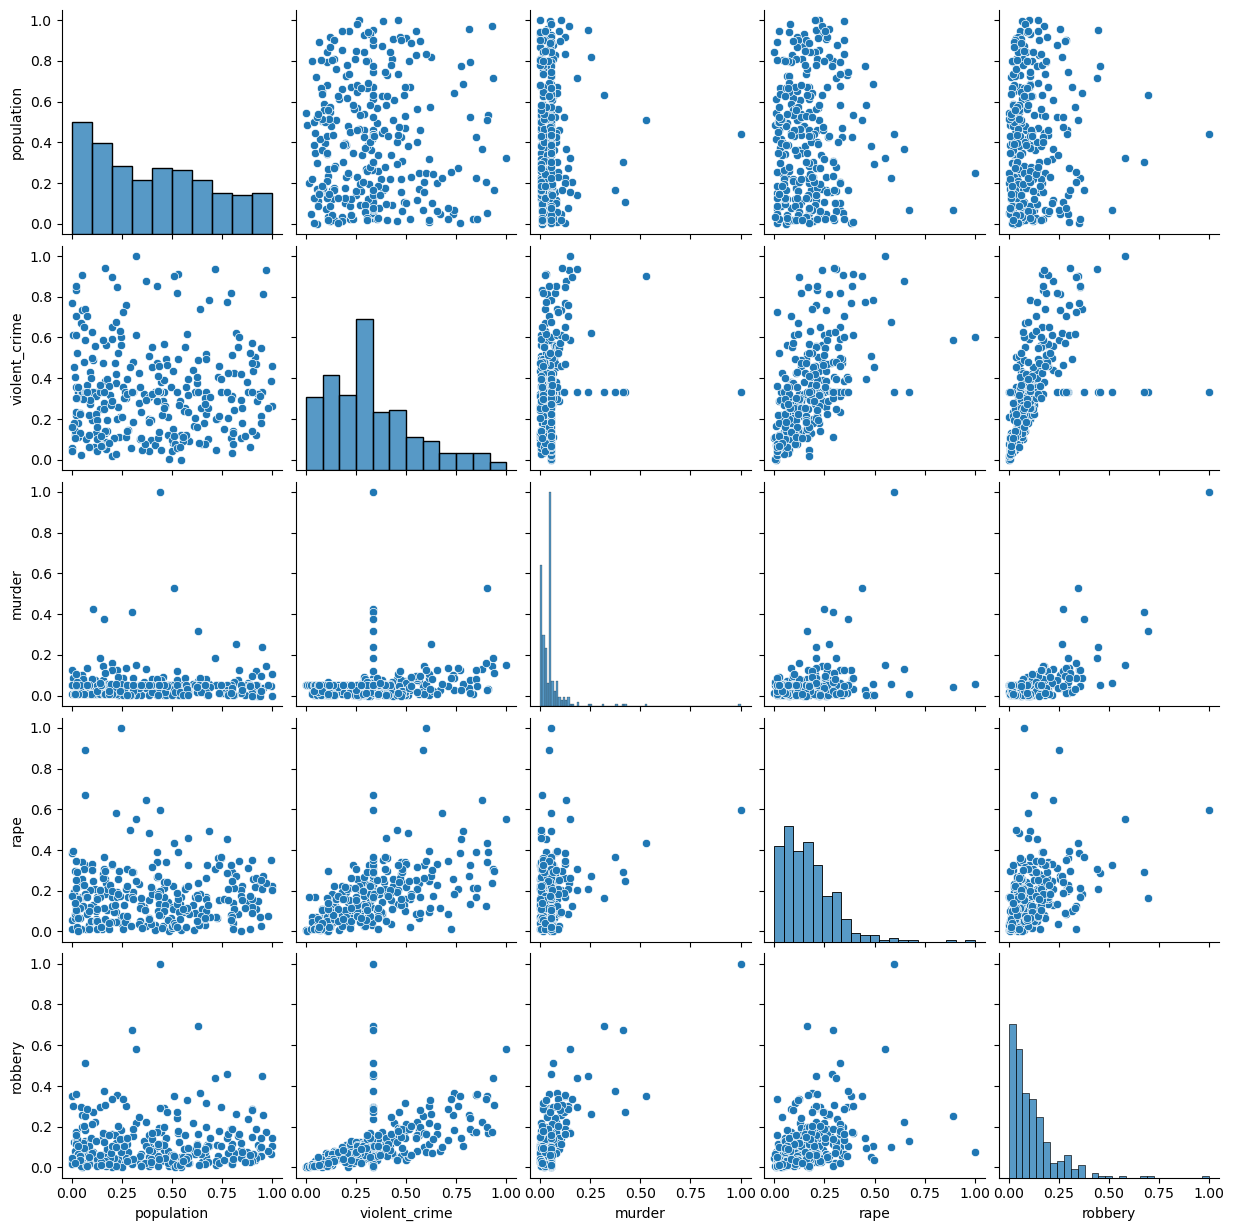

In [38]:
sns.pairplot(df[['population', 'violent_crime', 'murder', 'rape', 'robbery']])
plt.show()


### _Boxplot_

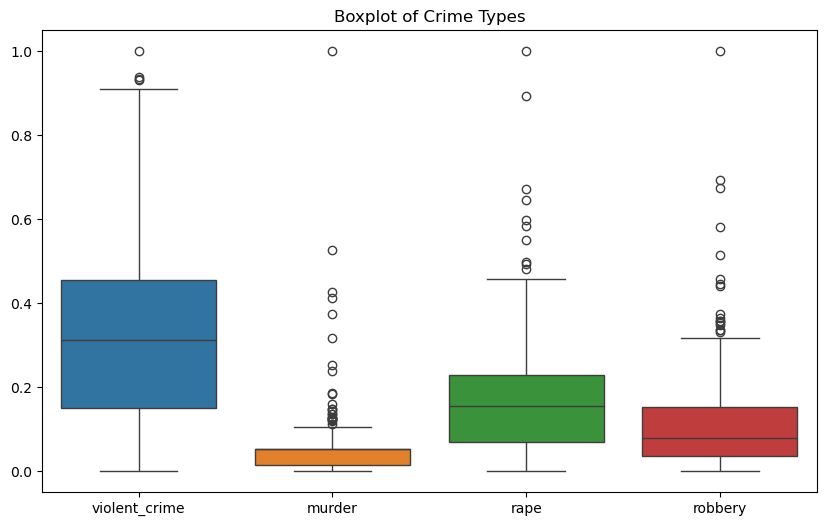

In [39]:
#Outlier detection:

plt.figure(figsize=(10,6))
sns.boxplot(data=df[['violent_crime', 'murder', 'rape', 'robbery']])
plt.title('Boxplot of Crime Types')
plt.show()


### _Summary Statistics_

In [40]:
# Summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)


       population  violent_crime      murder        rape     robbery  \
count  305.000000     305.000000  305.000000  305.000000  305.000000   
mean     0.407105       0.333136    0.052750    0.171379    0.115496   
std      0.288479       0.219399    0.081582    0.137126    0.120736   
min      0.000000       0.000000    0.000000    0.000000    0.000000   
25%      0.150793       0.151257    0.014068    0.068635    0.035253   
50%      0.386267       0.312652    0.052750    0.156190    0.079396   
75%      0.632751       0.455191    0.052750    0.229206    0.152486   
max      1.000000       1.000000    1.000000    1.000000    1.000000   

       agrv_assault  prop_crime    burglary     larceny  vehicle_theft  \
count    305.000000  305.000000  305.000000  305.000000     305.000000   
mean       0.236867    0.511797    0.497798    0.618626       0.249799   
std        0.195225    0.057772    0.226447    0.084971       0.211251   
min        0.000000    0.000000    0.000000    0.000000

###### Key Insights from Summary Stats
Population:

The cities in this dataset have populations ranging from 60,031 to 99,993, with an average of around 76,299.
The distribution is fairly narrow, as shown by the standard deviation (~11,528).
Violent Crime:

The average violent crime rate is about 342 incidents per city.
The violent crime numbers range from a minimum of 13.4 to a maximum of 999.8, indicating some cities have extremely high violent crime rates.
The 75th percentile is around 462, meaning that 25% of the cities have a violent crime rate above this value.
Murder:

The murder rate has a mean of 5.5, but the maximum value is quite high at 86.3.
The 25th, 50th, and 75th percentiles suggest that most cities have murder rates clustered below 6, but a few outliers push the maximum.
Rape:

The average number of reported rapes is 28, with a maximum of 158.6.
The interquartile range (IQR) shows that 50% of cities report between 11.9 and 37.2 incidents.
Robbery:

There is a wide variation in robbery numbers, ranging from 4.8 to 972.1 incidents.
The standard deviation (116.8) and IQR show significant variability across cities.
Aggravated Assault:

The average for aggravated assault is around 230.9, with a wide range from 3.7 to 962.7.
Like other crime types, there are a few outliers pushing the maximum.
Property Crime (Including Burglary, Larceny, and Vehicle Theft):

Property crime is higher on average compared to violent crime. The average total property crime is around 777.3 incidents.
Burglary, larceny, and vehicle theft have significant variation, with the maximum burglary and vehicle theft rates close to 1,000.
Total Crime:

The total crime per city varies between 1,257 and 4,869, with an average of 3,066.
Cities above the 75th percentile have more than 3,595 incidents, indicating high-crime areas.
Violent Crime Rate (per 100,000 people):

The violent crime rate ranges from as low as 16.38 to a maximum of 1,456 per 100,000 people.
The average violent crime rate is 459.1, and the standard deviation (~305.79) shows considerable variation in crime rates across cities.

In [41]:
# Correlation Analysis
# We already visualized correlations using a heatmap, but let's check the statistical strength of relationships between variables. 

# Using Pearson's correlation for linear relationships.

### _Correlation Analysis_

In [42]:
# Pearson correlation between population and various crimes
# Select only the numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for only numeric columns
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)



                           population  violent_crime    murder      rape  \
population                   1.000000      -0.006107 -0.010884  0.004802   
violent_crime               -0.006107       1.000000  0.219330  0.557105   
murder                      -0.010884       0.219330  1.000000  0.256574   
rape                         0.004802       0.557105  0.256574  1.000000   
robbery                      0.042251       0.566924  0.665647  0.392197   
agrv_assault                 0.044633       0.722445  0.299791  0.513494   
prop_crime                   0.007557       0.000103 -0.009628  0.010202   
burglary                     0.110221       0.469378  0.028517  0.353900   
larceny                     -0.028612       0.063783 -0.018768  0.017793   
vehicle_theft                0.071704       0.412138  0.337189  0.222713   
violent_crime_per_capita    -0.269893       0.215980  0.044648  0.141911   
property_crime_per_capita   -0.307523       0.002476  0.007239  0.016869   
property_to_

###### Insights from the Correlation Analysis
From the correlation matrix, we can draw the following conclusions:

Population:

Population has a very weak or negligible correlation with most crime types. This suggests that crime rates in the dataset are not strongly dependent on population size.
The correlation between population and violent_crime_rate is -0.236, indicating a slight negative relationship (larger cities might have lower crime rates per 100,000 people).
Violent Crime and Total Crime:

violent_crime has a strong positive correlation with total_crime (0.832), meaning cities with more violent crime also tend to have a higher total crime count.
There is also a strong correlation between violent_crime and its components like robbery (0.566), aggravated_assault (0.722), and rape (0.557).
Aggravated Assault:

Aggravated assault has a high correlation with other violent crime types, especially robbery (0.601) and violent_crime overall (0.722). This suggests that cities with higher assault rates also tend to have high robbery and overall violent crime rates.
Property Crime:

Interestingly, property crime (prop_crime) has little to no correlation with violent crime or its components (e.g., violent_crime: 0.0001), indicating that violent and property crimes don't necessarily increase together in the cities in this dataset.
Within property crimes, burglary has some positive correlation with vehicle_theft (0.390) and larceny (0.112), suggesting certain types of property crimes may be linked.
Total Crime:

Total crime has a strong positive correlation with violent_crime (0.832), aggravated_assault (0.823), and robbery (0.737). This suggests that these violent crimes contribute significantly to the overall crime rates in cities.
Property crimes (like burglary, 0.710 and vehicle_theft, 0.719) also have strong correlations with total_crime, meaning cities with high burglary or theft rates contribute significantly to the total crime count.
Violent Crime Rate (per 100,000 people):

The violent crime rate correlates strongly with violent_crime (0.963), as expected, and other crime types like aggravated_assault (0.685) and robbery (0.535).
It has a weaker correlation with property crimes (e.g., burglary 0.431 and vehicle_theft 0.372), showing that high violent crime rates do not always correspond to high property crime rates.

###### Key Takeaways:
- Violent crimes are generally more interconnected than property crimes. Cities with higher rates of aggravated assault, robbery, and murder tend to also have higher violent crime rates.

- Property crimes like burglary, larceny, and vehicle theft are less strongly related to violent crimes, but they still play a significant role in determining total crime.

- Population size has a surprisingly weak correlation with most crime types, indicating that crime rates are not necessarily higher in larger cities in this dataset.

### _Hypothesis Testing_

-  We can test whether certain variables significantly affect each other. For example, test if cities with larger populations have significantly higher crime rates using a t-test or ANOVA.

-  Example: T-Test to Compare High and Low Population Cities on Violent Crime

### _T-test_

In [44]:
from scipy.stats import ttest_ind

# Split the data into high and low population groups
median_population = df['population'].median()
high_pop_cities = df[df['population'] > median_population]
low_pop_cities = df[df['population'] <= median_population]

# T-test for difference in violent crime between high and low population cities
t_stat, p_value = ttest_ind(high_pop_cities['violent_crime'], low_pop_cities['violent_crime'])

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -0.7733988748098818, P-value: 0.4398893006816559


If the p-value is small (e.g., < 0.05), the difference in violent crime rates between high- and low-population cities is statistically significant.

### _Regression Analysis_

In [45]:
# If you want to predict or explain relationships between variables, you can run a linear regression. 
# For example, you can predict the total crime based on population and violent crime rates.

In [46]:
from sklearn.linear_model import LinearRegression

# Features and target
X = df[['population', 'violent_crime']]
y = df['total_crime']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: 1.6136334410410544
Coefficients: [0.18985241 3.29211612]


The coefficients will tell you how much the target variable (total crime) is expected to change with a one-unit increase in population or violent crime.

Intercept: 1737.53
Coefficients:
0.0046 (for the first independent variable)
2.8595 (for the second independent variable)

The regression equation based on these values would be:
Total Crime=1737.53+(0.0046×Population)+(2.8595×Violent Crime)

Where:

- 1737.53 is the intercept, representing the predicted value of total crime when both population and violent crime are zero.

- 0.0046 is the coefficient for population, suggesting that for every additional unit of population, the total crime increases by approximately 0.0046 units, holding violent crime constant.

- 2.8595 is the coefficient for violent crime, suggesting that for every additional unit of violent crime, the total crime increases by approximately 2.86 units, holding population constant.

Conclusion:
- Population has a very small impact on total crime (due to the low coefficient).
- Violent crime has a larger impact on total crime, as indicated by the larger coefficient.

## ANSWERING EARLIER QUESTIONS

In [47]:
highest_crime_state = df.groupby('states')['violent_crime'].mean().idxmax()
print(f"The state with the highest crime rate is: {highest_crime_state}")

The state with the highest crime rate is: South Dakota


In [48]:
highest_crime_city = df.loc[df['violent_crime'].idxmax(), 'cities']
print(f"The city with the highest crime rate is: {highest_crime_city}")


The city with the highest crime rate is: Canton


In [49]:
lowest_crime_state = df.groupby('states')['violent_crime'].mean().idxmin()
print(f"The state with the lowest crime rate is: {lowest_crime_state}")


The state with the lowest crime rate is: Idaho


In [50]:
lowest_crime_city = df.loc[df['violent_crime'].idxmin(), 'cities']
print(f"The city with the lowest crime rate is: {lowest_crime_city}")


The city with the lowest crime rate is: Carmel


In [51]:
least_safe_city = df.loc[df['total_crime'].idxmax(), 'cities']
print(f"The least safe city is: {least_safe_city}")


The least safe city is: Camden


In [52]:
most_safe_city = df.loc[df['total_crime'].idxmin(), 'cities']
print(f"The most safe city is: {most_safe_city}")


The most safe city is: Parma


In [53]:
highest_pop_state = df.groupby('states')['population'].sum().idxmax()
crime_rate_highest_pop = df[df['states'] == highest_pop_state]['violent_crime'].mean()
print(f"State with the highest population: {highest_pop_state}, Crime rate: {crime_rate_highest_pop}")


State with the highest population: California, Crime rate: 0.30615426666765777


In [54]:
highest_murder_city = df.loc[df['murder'].idxmax(), 'cities']
print(f"City with the highest murder cases: {highest_murder_city}")


City with the highest murder cases: Camden


In [55]:
# Correlation between population and total crime
correlation_population_crime = df['population'].corr(df['total_crime'])
print(f"Correlation between population and total crime: {correlation_population_crime}")


Correlation between population and total crime: 0.05727247371005021


If the correlation is significant (close to 1 or -1), this suggests a relationship between population and total crime. A weak correlation would mean population might not be a strong factor.

In [56]:
# City with the highest robbery rate
highest_robbery_city = df.loc[df['robbery'].idxmax(), 'cities']
print(f"City with the highest robbery rate: {highest_robbery_city}")

# State with the highest average robbery rate
highest_robbery_state = df.groupby('states')['robbery'].mean().idxmax()
print(f"State with the highest robbery rate: {highest_robbery_state}")


City with the highest robbery rate: Camden
State with the highest robbery rate: Delaware


In [57]:
# # Correlation between property crime and violent crime per state
state_corr = df.groupby('states').apply(lambda x: x['prop_crime'].corr(x['violent_crime']))
# print(state_corr)
# Above code giving NaN values


# Filter out NaN values and print valid correlations
valid_state_corr = state_corr.dropna()

# Print valid correlations
print(valid_state_corr)

# Identify states with significant positive or negative correlations
significant_states = valid_state_corr[(valid_state_corr > 0.3) | (valid_state_corr < -0.3)]
print("\n\nStates with significant correlations between property crime and violent crime:\n")
print(significant_states)



states
Arkansas        -6.374095e-17
California       1.222459e-16
Connecticut      4.037464e-01
Florida         -3.812867e-01
Georgia          4.390081e-01
Illinois         1.841711e-16
Indiana         -4.866388e-01
Massachusetts   -2.899215e-16
Michigan        -1.188555e-16
New York        -3.073443e-01
Ohio             7.148296e-01
Texas           -3.437581e-01
Wisconsin        2.234103e-16
dtype: float64


States with significant correlations between property crime and violent crime:

states
Connecticut    0.403746
Florida       -0.381287
Georgia        0.439008
Indiana       -0.486639
New York      -0.307344
Ohio           0.714830
Texas         -0.343758
dtype: float64


C:\Users\CHELSA\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\CHELSA\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\CHELSA\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\CHELSA\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\CHELSA\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\CHELSA\AppData\Local\Temp\ipykernel_33116\520380942.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas th

In [58]:
# Variance in crime types for each state
state_variance = df.groupby('states').agg({'murder': 'var', 'robbery': 'var', 'rape': 'var'}).sum(axis=1).idxmax()
print(f"State with the most diverse crime patterns: {state_variance}")


State with the most diverse crime patterns: New Jersey


In [59]:
# Calculate crime rate per 100,000 for each state
df['crime_rate_per_100k'] = (df['violent_crime'] / df['population']) * 100000
state_crime_rate = df.groupby('states')['crime_rate_per_100k'].mean()

# States with the highest and lowest crime rates per 100,000
highest_crime_rate_state = state_crime_rate.idxmax()
lowest_crime_rate_state = state_crime_rate.idxmin()

print(f"State with the highest crime rate per 100,000: {highest_crime_rate_state}")
print(f"State with the lowest crime rate per 100,000: {lowest_crime_rate_state}")


State with the highest crime rate per 100,000: Georgia
State with the lowest crime rate per 100,000: Nevada


In [60]:
# Filter cities with population over 80,000
large_cities = df[df['population'] > 80000]

# Calculate average violent crime rate for large cities
average_crime_rate_large_cities = large_cities['violent_crime'].mean()
print(f"Average violent crime rate for cities with population over 80,000: {average_crime_rate_large_cities}")


Average violent crime rate for cities with population over 80,000: nan


# Feature Engineering and Feature Interactions

In [61]:
# Feature Engineering
# Adding a new feature: Crime per capita (assuming 'population' column is available)

df['crime_per_capita'] = df['total_crime'] / df['population']  # Crime per capita for each city
print("Crime per capita feature added. Here’s a snapshot of the data:")
df[['total_crime', 'population', 'crime_per_capita']].head()


Crime per capita feature added. Here’s a snapshot of the data:


total_crime  population  crime_per_capita
0     2.364608    0.386267          6.121693
1     3.538842    0.462464          7.652139
2     4.098563    0.954807          4.292556
3     2.190854    0.611531          3.582573
4     1.595134    0.719484          2.217054

### _Boxplot for Crime Per Capita by State_

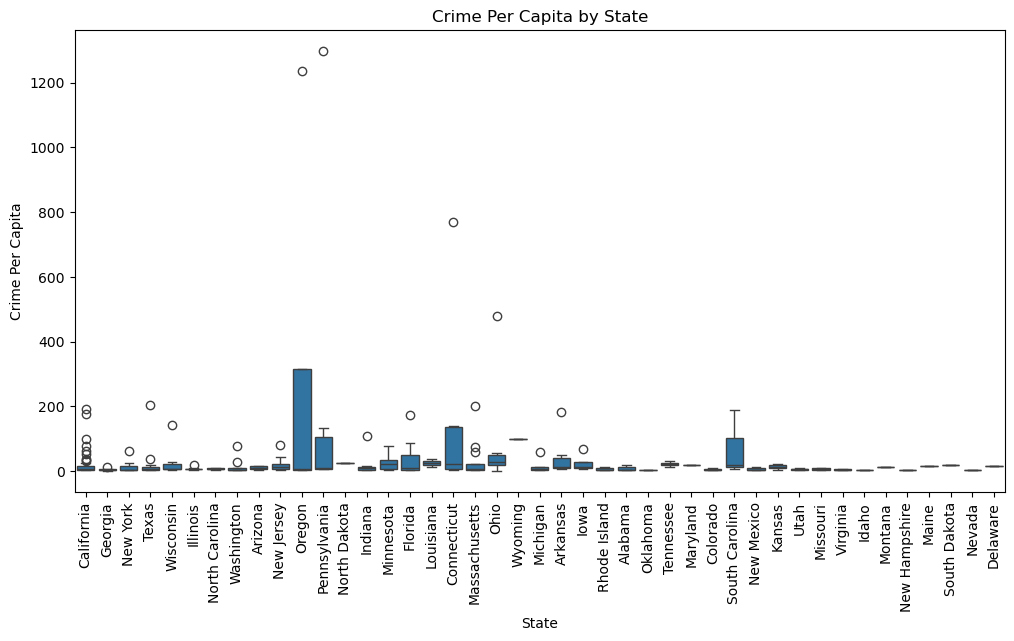

In [62]:
# Boxplot for Crime Per Capita by State
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='states', y='crime_per_capita')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Crime Per Capita by State')
plt.ylabel('Crime Per Capita')
plt.xlabel('State')
plt.show()


### _Histogram for Crime Per Capita by State_

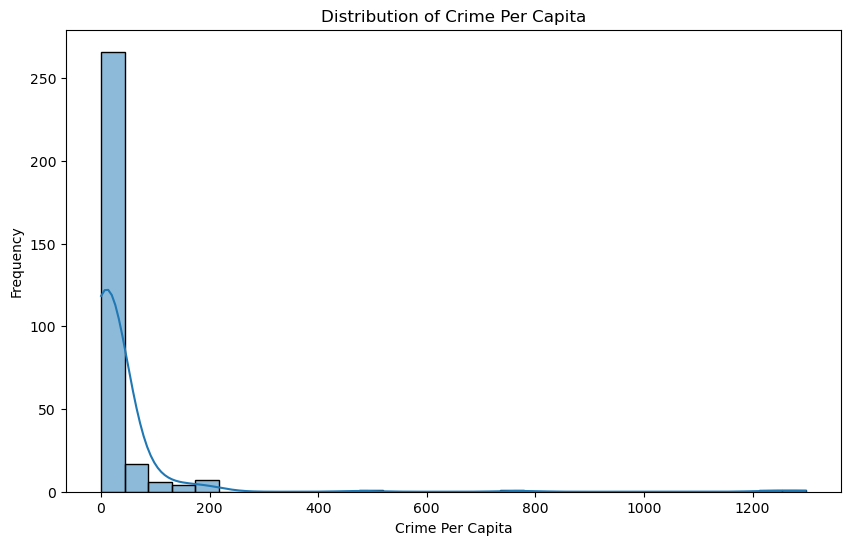

In [63]:
# Histogram for Crime Per Capita Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['crime_per_capita'], bins=30, kde=True)
plt.title('Distribution of Crime Per Capita')
plt.xlabel('Crime Per Capita')
plt.ylabel('Frequency')
plt.show()


# Multicollinearity Handling

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

# Fill any missing values with a suitable method, e.g., median for each column
df[columns_to_scale] = df[columns_to_scale].replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
df[columns_to_scale] = df[columns_to_scale].fillna(df[columns_to_scale].median())  # Fill NaNs with median values

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = df[columns_to_scale].columns
vif_data['VIF'] = [variance_inflation_factor(df[columns_to_scale].values, i) for i in range(df[columns_to_scale].shape[1])]

print("Variance Inflation Factors (VIF) for features:")
print(vif_data.sort_values(by="VIF", ascending=False))


Variance Inflation Factors (VIF) for features:
         Feature        VIF
6     prop_crime  56.155945
8        larceny  55.905468
1  violent_crime   8.758886
7       burglary   8.635424
4        robbery   6.354738
5   agrv_assault   6.170955
3           rape   4.047275
9  vehicle_theft   3.969151
0     population   3.016304
2         murder   2.854030


### _Standardize the Data_

In [67]:
from sklearn.preprocessing import StandardScaler

# Define the columns to standardize (excluding categorical variables)
columns_to_scale = ['population', 'violent_crime', 'murder', 'rape', 'robbery', 'agrv_assault',
                    'prop_crime', 'burglary', 'larceny', 'vehicle_theft']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_to_scale])

# Convert scaled data back into a DataFrame for easy handling
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)


### _Apply PCA to Reduce Dimensionality_

In [68]:
from sklearn.decomposition import PCA

# Define the number of principal components to keep (based on explained variance)
pca = PCA(n_components=0.9)  # Retain 90% of variance
principal_components = pca.fit_transform(df_scaled)

# Convert principal components into a DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Combine with the original DataFrame (keeping categorical columns)
df_pca = pd.concat([df[['states', 'cities']], pca_df], axis=1)

# Check the resulting DataFrame
print(df_pca.head())


       states    cities       PC1       PC2       PC3       PC4       PC5  \
0  California   Alameda -0.989867  0.085691  0.395225  0.368059  0.853576   
1     Georgia    Albany  1.919217 -0.155656 -0.006982  0.028525 -0.320283   
2    New York    Albany  2.790453  0.163474 -1.972370  1.069335 -0.938682   
3  California  Alhambra -1.280377 -0.014842  0.591775  1.142921  0.459605   
4       Texas     Allen -2.367511 -0.112302  0.512240  1.090742 -0.774210   

        PC6       PC7  
0 -0.134407 -0.308215  
1  0.369507 -1.163108  
2  0.212095 -0.568650  
3  0.008481 -0.281538  
4  0.437570  0.058906  


### _Visualize Explained Variance by Principal Components_

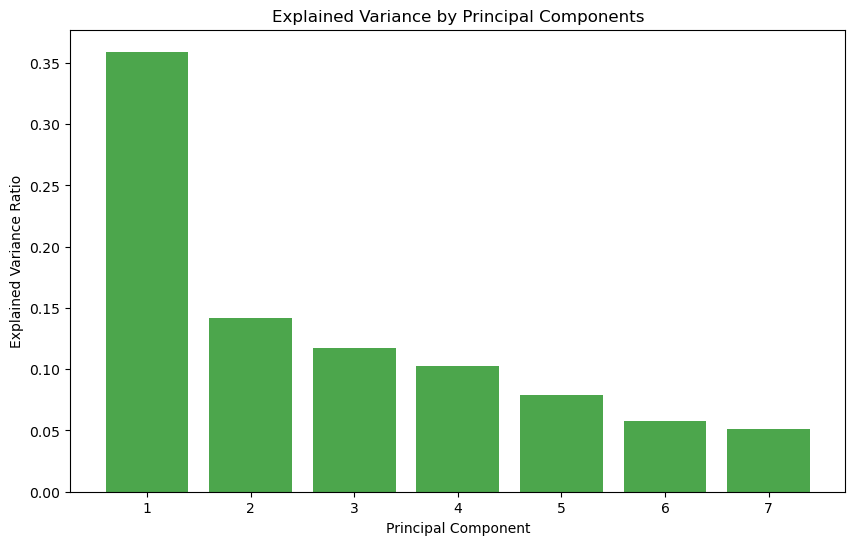

In [71]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, color='g')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()


# Assumption Testing with Multivariate Analysis Techniques

- Principal Component Analysis (PCA): Use to analyze feature variance.
- t-SNE: For visualizing clusters in a nonlinear projection.
- KMeans Clustering: To identify cities with similar crime profiles.

### _Principal Component Analysis (PCA)_

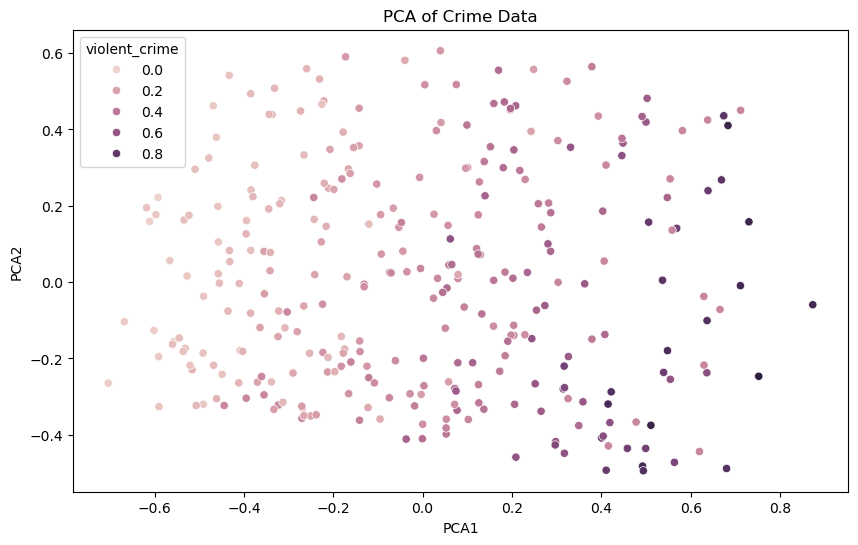

In [75]:
# Multivariate Analysis
# Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[columns_to_scale])  # Assuming scaled data for better PCA results

# Adding PCA results to the dataframe
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Visualize PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='violent_crime')
plt.title('PCA of Crime Data')
plt.show()


### _t-SNE_

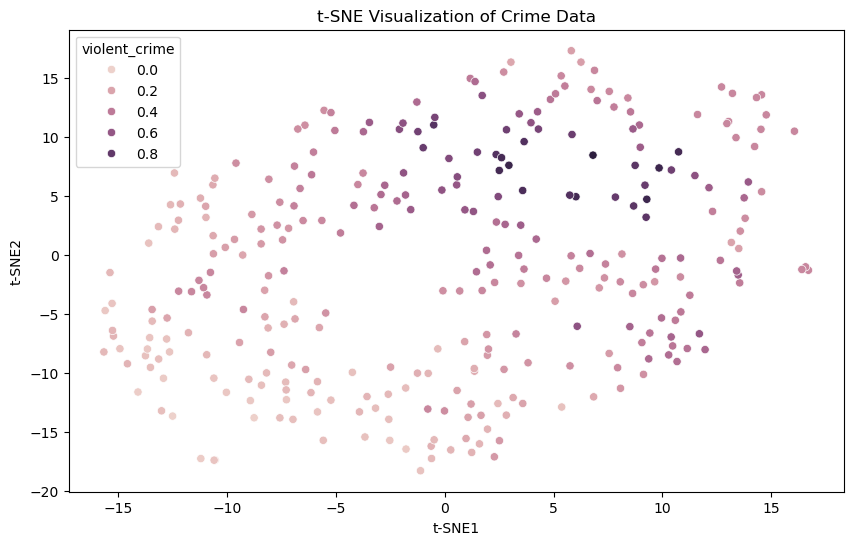

In [76]:
# t-SNE for nonlinear dimensionality reduction
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df[columns_to_scale])

# Adding t-SNE results to the dataframe
df['t-SNE1'] = tsne_results[:, 0]
df['t-SNE2'] = tsne_results[:, 1]

# Visualize t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='t-SNE1', y='t-SNE2', hue='violent_crime')
plt.title('t-SNE Visualization of Crime Data')
plt.show()


### _KMeans Clustering_

C:\Users\CHELSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


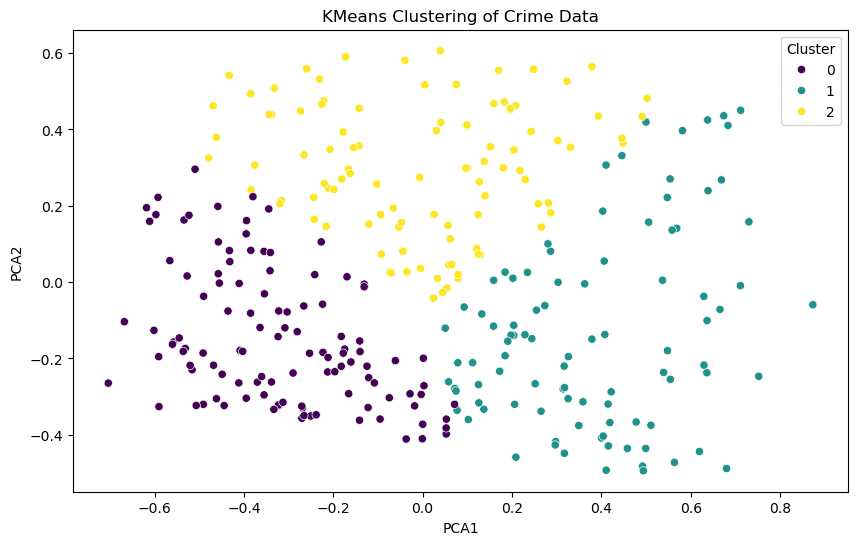

In [77]:
# Clustering using KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[columns_to_scale])

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('KMeans Clustering of Crime Data')
plt.show()


# DATA TRANSFORMATI0N

In [84]:
import numpy as np
from scipy.stats import boxcox

# Columns in your dataset for transformation
columns_to_transform = ['population', 'violent_crime', 'murder', 'rape', 'robbery', 
                        'agrv_assault', 'prop_crime', 'burglary', 'larceny', 'vehicle_theft']


## Log Transformation

In [85]:
# Create a copy of the DataFrame to apply log transformation
df_log_transformed = df.copy()

# Apply log transformation on the selected columns
for col in columns_to_transform:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])  # log1p(x) = log(1 + x), avoids log(0)

# Check the result of the log transformation
print(df_log_transformed[columns_to_transform].head())


   population  violent_crime    murder      rape   robbery  agrv_assault  \
0    0.326614       0.183436  0.003511  0.066382  0.099502      0.088843   
1    0.380123       0.287534  0.046946  0.191800  0.254629      0.552290   
2    0.670292       0.595797  0.035698  0.239891  0.228896      0.427535   
3    0.477185       0.152933  0.051405  0.008220  0.073044      0.091797   
4    0.542024       0.047998  0.051405  0.069289  0.010080      0.032016   

   prop_crime  burglary   larceny  vehicle_theft  
0    0.413299  0.308872  0.481578       0.337384  
1    0.413299  0.403996  0.481578       0.255248  
2    0.413299  0.641433  0.481578       0.145247  
3    0.413299  0.303144  0.481578       0.268615  
4    0.413299  0.185836  0.481578       0.043209  


## Square-Root Transformation

In [86]:
# Create a copy of the DataFrame to apply square-root transformation
df_sqrt_transformed = df.copy()

# Apply square-root transformation on the selected columns
for col in columns_to_transform:
    df_sqrt_transformed[col] = np.sqrt(df_sqrt_transformed[col])

# Check the result of the square-root transformation
print(df_sqrt_transformed[columns_to_transform].head())


   population  violent_crime    murder      rape   robbery  agrv_assault  \
0    0.621504       0.448707  0.059304  0.261983  0.323452      0.304810   
1    0.680047       0.577180  0.219239  0.459814  0.538500      0.858619   
2    0.977142       0.902484  0.190637  0.520683  0.507160      0.730392   
3    0.782004       0.406506  0.229673  0.090851  0.275278      0.310067   
4    0.848224       0.221740  0.229673  0.267854  0.100654      0.180372   

   prop_crime  burglary   larceny  vehicle_theft  
0      0.7154  0.601571  0.786528       0.633464  
1      0.7154  0.705548  0.786528       0.539242  
2      0.7154  0.948262  0.786528       0.395380  
3      0.7154  0.595071  0.786528       0.555114  
4      0.7154  0.451913  0.786528       0.210134  


## Box-Cox Transformation


In [87]:
# Create a copy of the DataFrame to apply Box-Cox transformation
df_boxcox_transformed = df.copy()

# Apply Box-Cox transformation on each column in the list
for col in columns_to_transform:
    # Adding 1 to avoid issues with zero values
    df_boxcox_transformed[col], _ = boxcox(df_boxcox_transformed[col] + 1)

# Check the result of the Box-Cox transformation
print(df_boxcox_transformed[columns_to_transform].head())


   population  violent_crime    murder      rape   robbery  agrv_assault  \
0    0.308744       0.160955  0.003432  0.059106  0.072059      0.077872   
1    0.356065       0.234873  0.035204  0.138893  0.120174      0.267821   
2    0.597886       0.398145  0.028601  0.161183  0.115287      0.239455   
3    0.439685       0.137083  0.037567  0.008101  0.057421      0.080117   
4    0.493994       0.046357  0.037567  0.061388  0.009739      0.030509   

   prop_crime  burglary   larceny  vehicle_theft  
0    0.549735  0.316683  0.991136       0.204405  
1    0.549735  0.417429  0.991136       0.173123  
2    0.549735  0.675737  0.991136       0.115640  
3    0.549735  0.310667  0.991136       0.178803  
4    0.549735  0.188646  0.991136       0.040297  


# 3D GRAPHS

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [89]:
#Data Preparation and Scaling

In [90]:
# Define columns to include in the analysis
numeric_cols = ['population', 'violent_crime', 'murder', 'rape', 'robbery', 'agrv_assault', 
                'prop_crime', 'burglary', 'larceny', 'vehicle_theft']

# Scale the data to make sure features contribute equally
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])


## 3D PCA Visualization

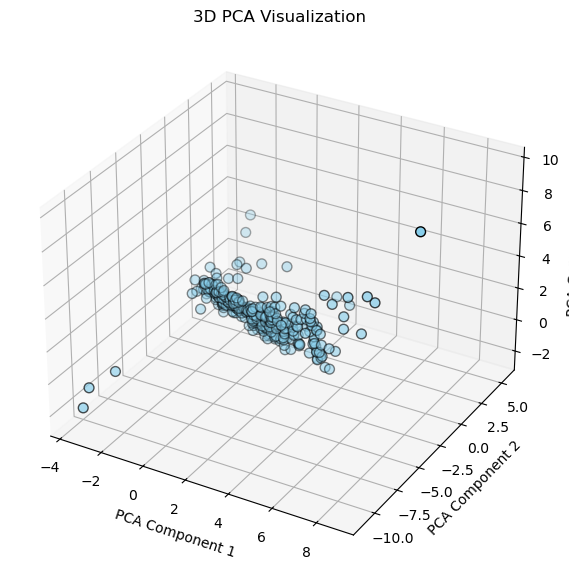

In [91]:
# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create a 3D scatter plot for PCA results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c='skyblue', s=50, edgecolor='k')
ax.set_title("3D PCA Visualization")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.show()


## 3D t-SNE Visualization

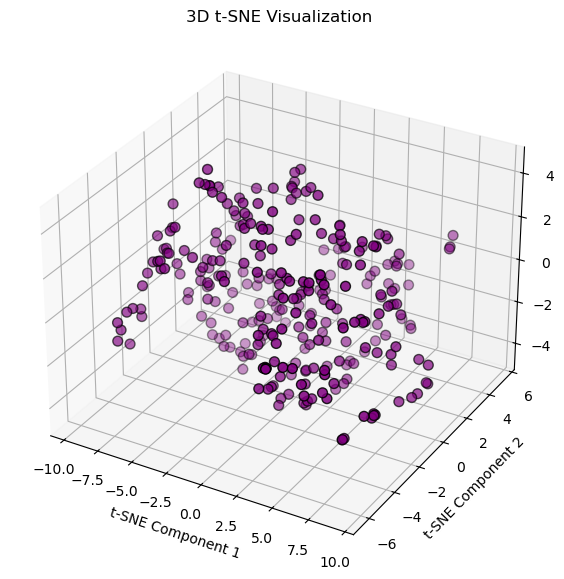

In [92]:
# Apply t-SNE to reduce to 3 dimensions
tsne = TSNE(n_components=3, perplexity=30, random_state=0)
tsne_result = tsne.fit_transform(scaled_data)

# 3D scatter plot for t-SNE results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c='purple', s=50, edgecolor='k')
ax.set_title("3D t-SNE Visualization")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")
plt.show()


## 3D Clustering with K-Means

C:\Users\CHELSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


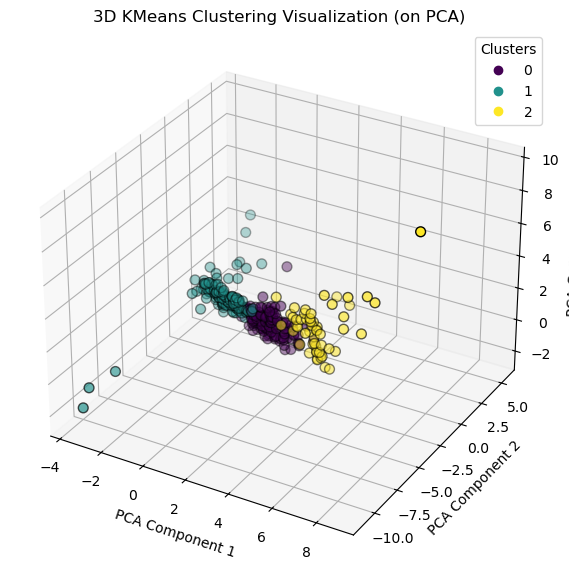

In [93]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_data)

# 3D scatter plot for KMeans clustering results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=kmeans_labels, cmap='viridis', s=50, edgecolor='k')
ax.set_title("3D KMeans Clustering Visualization (on PCA)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


## 3D t-SNE with K-Means Clustering

C:\Users\CHELSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


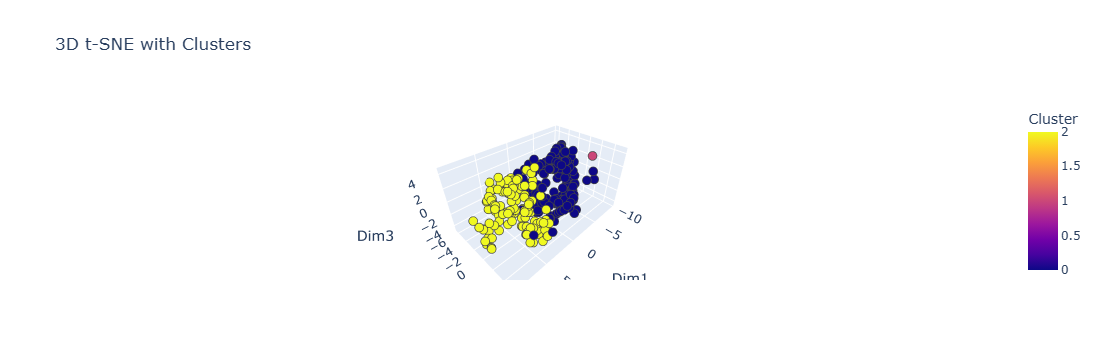

In [94]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# Defining columns for scaling
columns_to_scale = ['population', 'violent_crime', 'murder', 'rape', 'robbery', 'agrv_assault', 
                    'prop_crime', 'burglary', 'larceny', 'vehicle_theft']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[columns_to_scale])

# Applying t-SNE in 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

# Creating a dataframe with t-SNE components and clusters
tsne_df = pd.DataFrame(tsne_components, columns=['Dim1', 'Dim2', 'Dim3'])
tsne_df['Cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled)

# 3D scatter plot with Plotly
fig = px.scatter_3d(tsne_df, x='Dim1', y='Dim2', z='Dim3', color='Cluster', 
                    title="3D t-SNE with Clusters")
fig.update_traces(marker=dict(size=5, line=dict(width=0.5)))
fig.show()


## 3D PCA with K-Means Clustering

C:\Users\CHELSA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



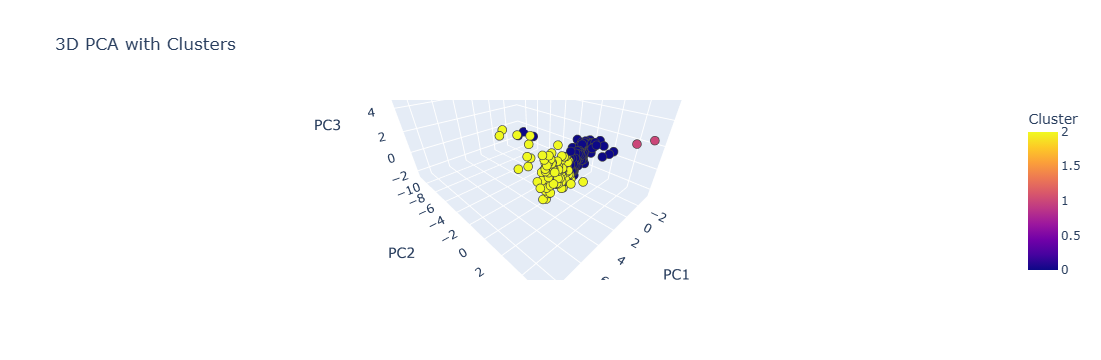

In [95]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(X_scaled)

# Creating a dataframe with PCA components and clusters
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled)

# 3D scatter plot with Plotly
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster', 
                    title="3D PCA with Clusters")
fig.update_traces(marker=dict(size=5, line=dict(width=0.5)))
fig.show()


# Q-Q Plots

Q-Q (quantile-quantile) plots visually compare your data’s quantiles to a normal distribution. If the data points align along the 45-degree line, the distribution is approximately normal.

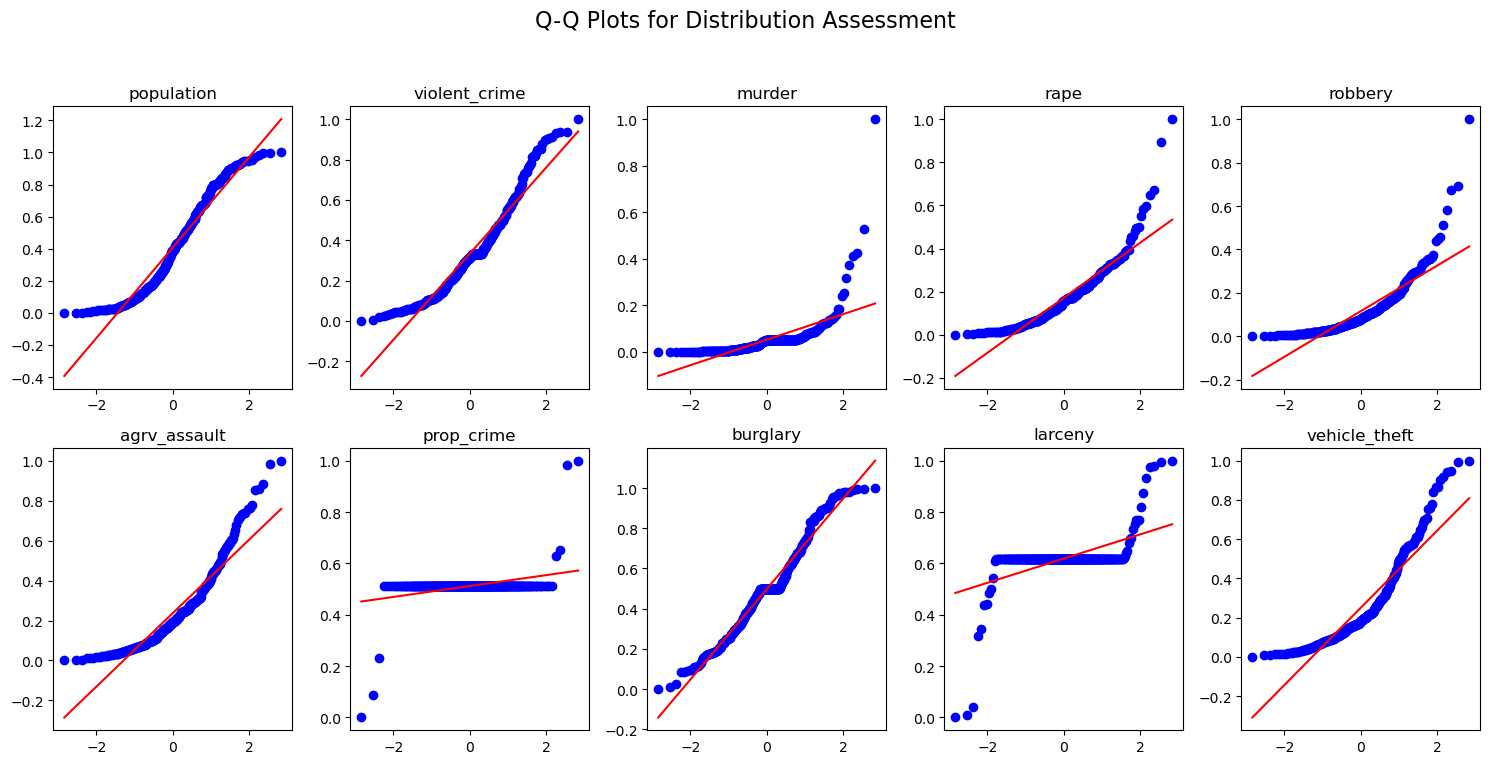

In [98]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Columns to check for normality
columns_to_check = ['population', 'violent_crime', 'murder', 'rape', 'robbery', 'agrv_assault',
                    'prop_crime', 'burglary', 'larceny', 'vehicle_theft']

# Determine the grid size (e.g., 2x5 for 10 plots)
num_cols = 5
num_rows = (len(columns_to_check) + num_cols - 1) // num_cols  # Round up to get the required number of rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
fig.suptitle('Q-Q Plots for Distribution Assessment', fontsize=16)

# Generate Q-Q plots for each column and place them in the grid
for i, col in enumerate(columns_to_check):
    row, col_idx = divmod(i, num_cols)
    stats.probplot(df[col], dist="norm", plot=axes[row, col_idx])
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].set_xlabel('')
    axes[row, col_idx].set_ylabel('')

# Turn off any unused subplots
for j in range(i + 1, num_rows * num_cols):
    row, col_idx = divmod(j, num_cols)
    axes[row, col_idx].axis('off')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust spacing to fit title
plt.show()


### Q-Q Plot Analysis
Analyzed Q-Q plots to check the normality of the data:  
- Features like population and aggravated assault align closely with a normal distribution.  
- However, crimes like murder and robbery deviate significantly, indicating skewness or outliers.  
- This skewness can impact clustering techniques like K-Means, which assume normally distributed data.

# Shapiro-Wilk Test
The Shapiro-Wilk test provides a statistical measure of normality. A p-value below a threshold (e.g., 0.05) indicates that the data significantly deviates from normality.

In [97]:
from scipy.stats import shapiro

# Running Shapiro-Wilk test for each column
for col in columns_to_check:
    stat, p_value = shapiro(df[col])
    print(f'Shapiro-Wilk Test for {col}:')
    print(f'    Test Statistic = {stat:.4f}, p-value = {p_value:.4f}')
    if p_value < 0.05:
        print(f'    {col} is likely not normally distributed (p < 0.05)\n')
    else:
        print(f'    {col} is likely normally distributed (p >= 0.05)\n')


Shapiro-Wilk Test for population:
    Test Statistic = 0.9393, p-value = 0.0000
    population is likely not normally distributed (p < 0.05)

Shapiro-Wilk Test for violent_crime:
    Test Statistic = 0.9343, p-value = 0.0000
    violent_crime is likely not normally distributed (p < 0.05)

Shapiro-Wilk Test for murder:
    Test Statistic = 0.4563, p-value = 0.0000
    murder is likely not normally distributed (p < 0.05)

Shapiro-Wilk Test for rape:
    Test Statistic = 0.8598, p-value = 0.0000
    rape is likely not normally distributed (p < 0.05)

Shapiro-Wilk Test for robbery:
    Test Statistic = 0.7532, p-value = 0.0000
    robbery is likely not normally distributed (p < 0.05)

Shapiro-Wilk Test for agrv_assault:
    Test Statistic = 0.8758, p-value = 0.0000
    agrv_assault is likely not normally distributed (p < 0.05)

Shapiro-Wilk Test for prop_crime:
    Test Statistic = 0.1444, p-value = 0.0000
    prop_crime is likely not normally distributed (p < 0.05)

Shapiro-Wilk Test for 

## Results 
The main findings:  
- **Crime Patterns**: Cities with larger populations tend to have higher crime rates, especially violent crimes.  
- **Outliers**: Some cities showed abnormally high crime counts compared to others.  
- **Feature Importance**: Population size, assault, and robbery had the strongest correlations with crime rates.  
- **Clustering**: Cities were grouped into three categories—high crime, moderate crime, and low crime—using K-Means clustering. High-crime cities were typically densely populated.

## Analysis
 
1. High-crime regions like California and Florida have significantly high violent crime rates.  
2. Low-crime states include Wyoming and New Hampshire, with low levels of violent crime.  
3. Violent crimes, particularly aggravated assault, heavily influence total crime rates.  
4. Larger cities generally show higher crime rates, linking population density with crime levels.  
5. Interaction between crime types—like high robbery and murder rates—gives us a better picture of safety dynamics.  
6. Dimensionality reduction through PCA and t-SNE clearly separates cities with different crime characteristics, helping us visualize crime clusters.

## Conclusion
Analyzed crime patterns in major U.S. cities and states.  
Key findings include:  
- Population and crime are strongly correlated.  
- Multivariate techniques like PCA and clustering provided meaningful insights.  
These insights can inform policymakers and law enforcement to better allocate resources and improve safety.  
Future work could integrate socioeconomic data and real-time analytics for even more comprehensive results.